# Python Data Science Handbook by Jake VanderPlas
## Chapter 5 Machine Learning

pages 332- 359

### Machine Learning
- in Data Science Context
    - Machine Learning as a maeans of building models of data
    
### Categories of Machine LEarning
1. Supervised Learning
      - modeling the relationship between measured features of data and some label associated with data
      - can be divided into
          - classification tasks
          - regression tasks
2. Unsupervised learning
    - modeling the features of a dataset without reference to any label
    - "letting the dataset speak for itself"
    - incudes
        - clustering
        - dimensionality reduction
  
(3). Semi-supervised learning methods

### Scikit-learn

- characterized by a clean, uniform, and streamlined API

### Data Representation in Scikit-Learn


In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Features matrix (X)
    - assumed to be to-dimensional, with shape [n_samples, n_features]

Target array (Y)
    - usually one dimensional, with length n_samples
    - the quentity we want to predict from the data
    - dependent variable

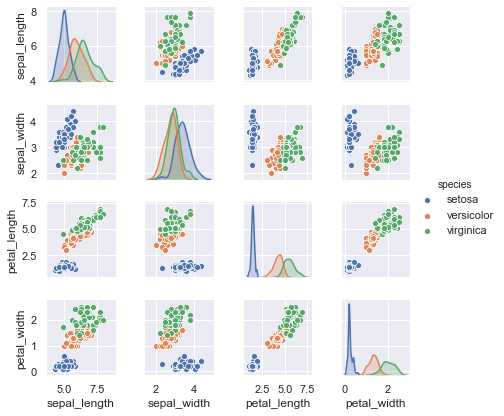

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [4]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

### Scikit-Learn's Estiator API

Guiding principles
- Consistency
- Insepction
- Limited object hierrarchy
- Composition
- Sensible defaults

### Basics of the API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):
1. Choose a class of model by importing the appropriate estimator class from Scikit-
Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion
from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
    - For supervised learning, often we predict labels for unknown data using the predict() method.
    - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

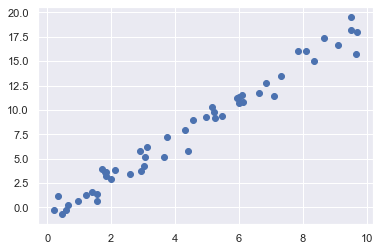

In [7]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.

In [8]:
from sklearn.linear_model import LinearRegression
# every class of model is represented by a Python class
# other general linear regression models exist as well

2. Choose model hyperparameters.

    - An important point is that a class of model is not the same as an instance of a model.
    - Once we have decided on our model class, there are still some options open to us.
    - Depending on the model class we are working with, we might need to answer one or more questions like the following:
        - Would we like to fit for the offset (i.e., intercept)?
        - Would we like the model to be normalized?
        - Would we like to preprocess our features to add model flexibility?
        - What degree of regularization would we like to use in our model?
        - How many model components would we like to use?
        
    - hyperparameters
        - parameteres that must be set before the model is fot to data

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3. Arrange data into a features matrix and target vector.
    - X of shape [n_samples, n_features]
    - Y of shape [n_samples]

In [14]:
X = x[: , np.newaxis]
X.shape

(50, 1)

4. Fit the model to your data

In [15]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# In Scikit-Learn, by convention all model parameters that 
# were learned during the fit() process have trailing
# underscores
print(model.coef_) # slope
print(model.intercept_) # intercept

[1.9776566]
-0.9033107255311164


5. Predict labels for unknown data

In [19]:
xfit = np.linspace(-1 ,11)

In [20]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

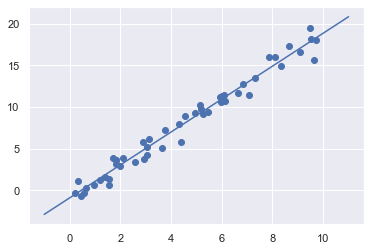

In [21]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

---
### Supervised learning example: Iris classification

In [25]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

In [26]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

---
### Unsupervised learning example: Iris dimensionality

- Iris data is four dimensional: there are four features recorded for each sample.
- The task of dimensionality reduction is to ask whether there is a suitable lowerdimensional representation that retains the essential features of the data.

In [28]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2)           # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                     # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)        # 4. Transform the data to two dimensions

A quick way to plot this is to insert the results into the original
Iris DataFrame, and use Seaborn’s lmplot to show the results.

In [29]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

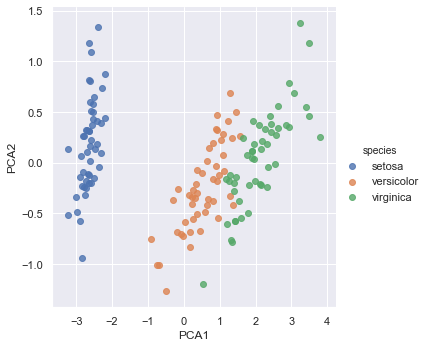

In [30]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels

---
### Unsupervised learning: Iris clustering

- A clustering algorithm attempts to find distinct groups of data without reference to any labels.
- We will be using Gaussian mixture model (GMM), this model attempts to model the data as a collection of Gaussian blobs

In [33]:
from sklearn.mixture import GaussianMixture    # 1. Choose the model class
model = GaussianMixture(n_components=3,
covariance_type='full')            # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris)                  # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)      # 4. Determine cluster labels

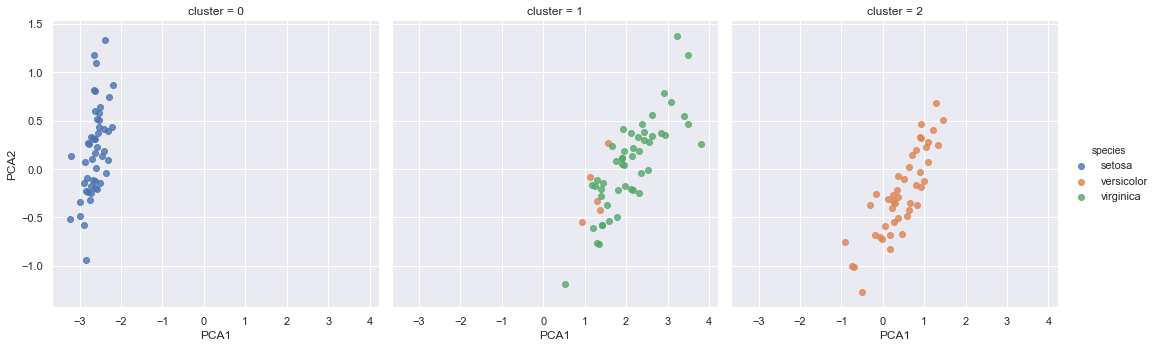

In [34]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);

---
### Application: Exploring Handwritten Digits

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

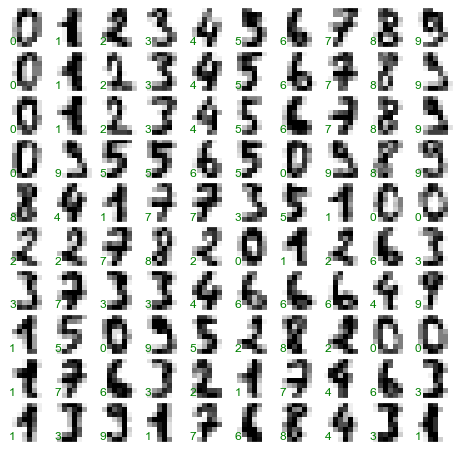

In [36]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [37]:
# treating each pixel in the image as a feature
X = digits.data
X.shape

(1797, 64)

In [38]:
y = digits.target
y.shape

(1797,)

In [39]:
# There are 1,797 samples and 64 features.

---
### Unsupervised learning: Dimensionality reduction

In [40]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

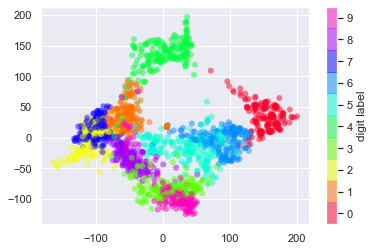

In [49]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [51]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

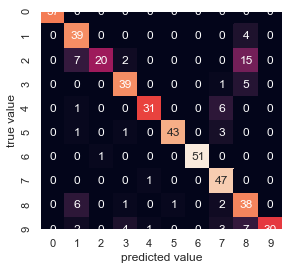

In [53]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

- 2 misclassified as 1 or 8
- 3 misclassified as 8
- 4 misclassified as 7
- 9 misclassified as 8

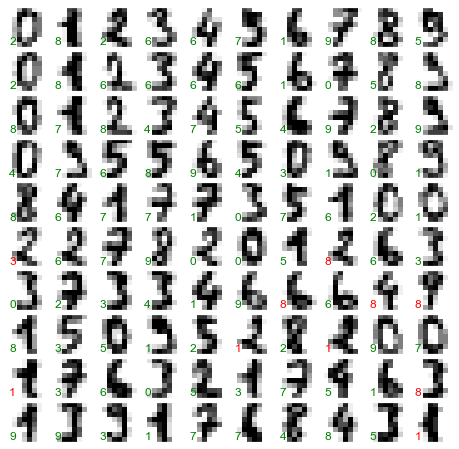

In [54]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Recommendations:
- Move to a more sophisticated algorithm, such as SVM (support vector machines) or random forests, or another classification approach

### **import/instantiate/fit/predict pattern**